In [1]:
import numpy as np
from utils import ICA
import matplotlib.pyplot as plt

In [2]:
def sinusoidal(x: np.ndarray):
    return np.sin(x)

def ramp(x: np.ndarray):
    return 2 * (x - np.floor(0.5 + x))

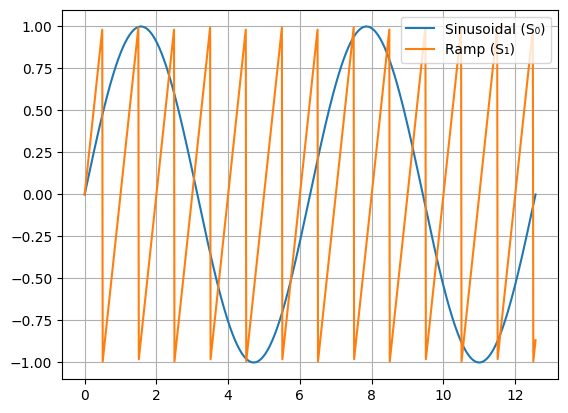

In [3]:
x = np.linspace(0, 4*np.pi, 1000)
A = sinusoidal(x)
B = ramp(x)

plt.plot(x, A, label="Sinusoidal (S₀)")
plt.plot(x, B, label="Ramp (S₁)")
plt.grid(True)
plt.legend()
plt.show()

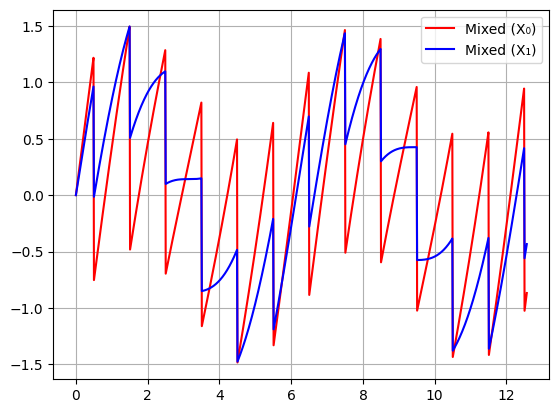

In [4]:
mixing_matrix = np.array([[0.5, 1], [1, 0.5]])
s = np.array([A, B])

ica = ICA(2)
ica.fit(mixing_matrix, s)

plt.plot(x, ica.x[0], label="Mixed (X₀)", color="red")
plt.plot(x, ica.x[1], label="Mixed (X₁)", color="blue")
plt.grid(True)
plt.legend()
plt.show()

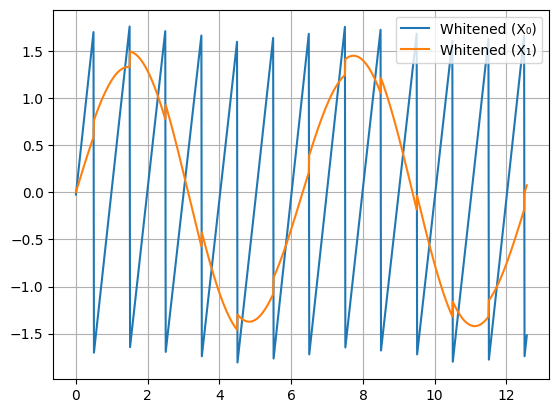

In [5]:
W = ica.transform()

plt.plot(x, ica.whitened[0], label="Whitened (X₀)")
plt.plot(x, ica.whitened[1], label="Whitened (X₁)")
plt.grid(True)
plt.legend()
plt.show()

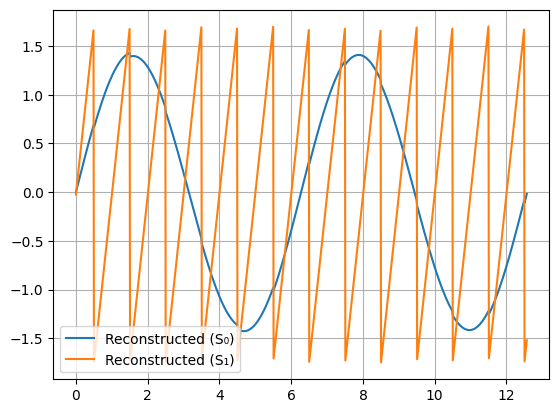

In [6]:
# Reconstruct the original signals using the unmixing matrix

S = W @ ica.whitened

plt.plot(x, S[0], label="Reconstructed (S₀)")
plt.plot(x, S[1], label="Reconstructed (S₁)")
plt.grid(True)
plt.legend()
plt.show()